<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/practica_2_ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Práctica 2: Análisis de un sistma de ecuaciones diferenciales acopladas y no lineales

Autor: Biología de sistemas

Fecha: 9 de diciembre del 2020

Cargar librerías

In [ ]:
install.packages("deSolve")
install.packages("FME")
install.packages("phaseR")

In [52]:
library(phaseR)
source("Grind.R")

-------------------------------------------------------------------------------
phaseR: Phase plane analysis of one- and two-dimensional autonomous ODE systems
-------------------------------------------------------------------------------

v.2.1: For an overview of the package's functionality enter: ?phaseR

For news on the latest updates enter: news(package = "phaseR")



grind.R was sourced


Definir función (esto es, el modelo)

In [59]:
Angeli2004 <- function(t, y, parms){  
    #         1      2       3      4       5     6      7   8   9
  #parms=(alpha1, alpha2, beta1, beta2, gamma1, gamma2, K1, K2, v)
         dX <- parms[1]*(1-y[1])-parms[3]*y[1]*(parms[9]*y[2])^parms[5]/(parms[7]+(parms[9]*y[2])^parms[5]);  
         dY <- parms[2]*(1-y[2])-parms[4]*y[2]*y[1]^parms[6]/(parms[8]+y[1]^parms[6]);
         list(c(dX,dY))
}

Declarar valor de los prámetros que permanecerán constantes

In [60]:
alpha1 <- 1
alpha2 <- 1
beta1 <- 200
beta2 <- 10
gamma1 <- 4
gamma2 <- 4
k1 <- 30
k2 <- 1
v <- 1

Establecer condiciones iniciales

In [64]:
ini_1 <- c(0,0)
ini_2 <- c(0,0.9)

Tiempo de integración

In [65]:
tspan <- seq(from = 0, to = 10, by = 0.01)

# Pregunta 1: Dinámica del sistema 

## Parámetro de bifurcación

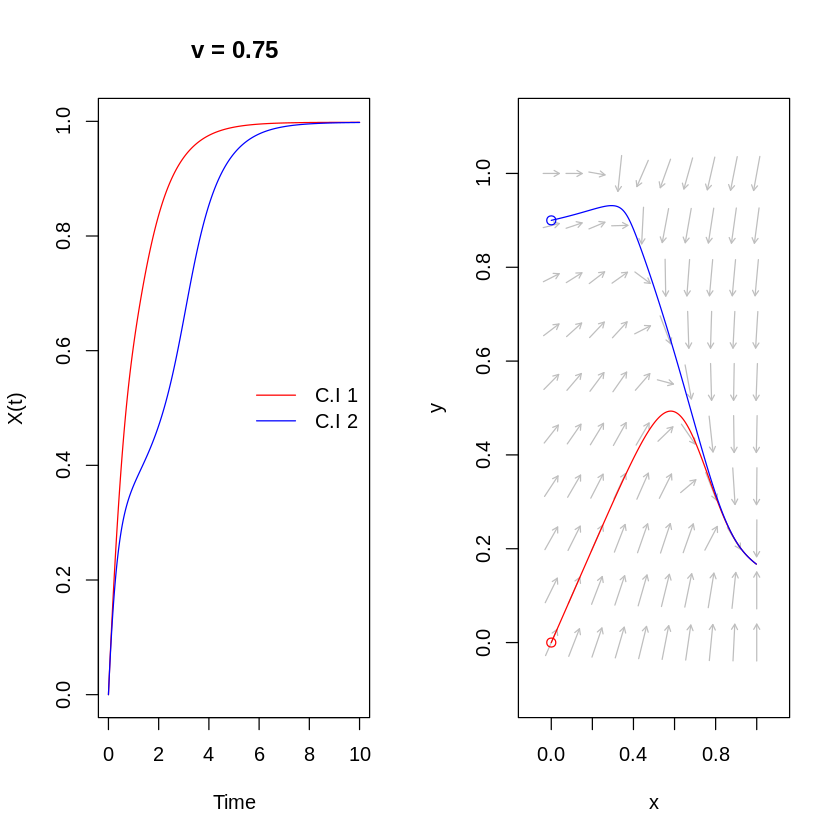

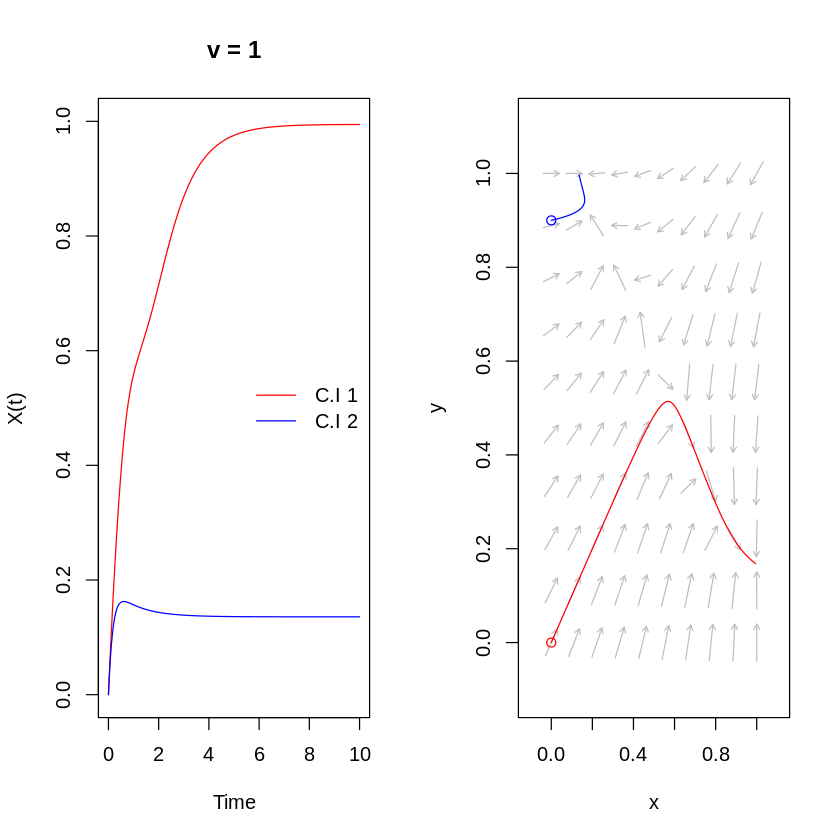

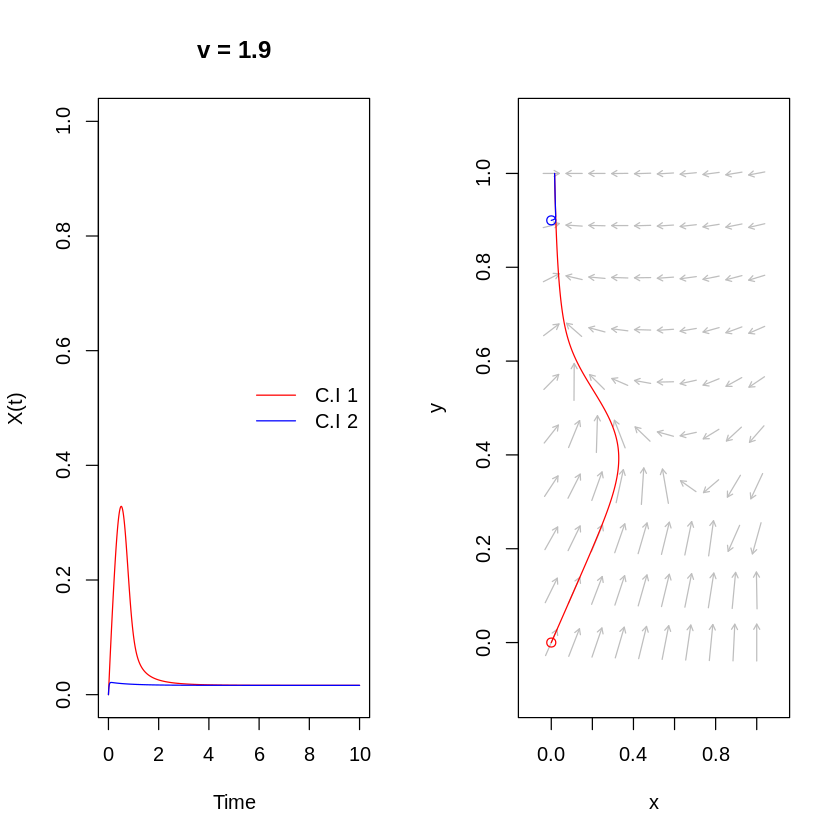

In [77]:
for(v in c(0.75, 1, 1.9)) {

  p <- c(alpha1, alpha2, beta1, beta2, gamma1, gamma2, k1, k2, v)
  # ¡A integrar!
  out1 <- ode(y = ini_1, times = tspan, func = Angeli2004, parms = p)

  par(mfrow=c(1,2))
  plot(out1[,1], out1[,2],type = "l", ylim=c(0,1),
     col="red", xlab = "Time", ylab = "X(t)", main = paste0("v = ", v))

  #Ahora con la segunda condición inicial
  out2 <- ode(y = ini_2, times = tspan, func = Angeli2004, parms = p)
  lines(out2[,1], out2[,2],type = "l", col="blue")
  legend("right", legend = c("C.I 1", "C.I 2"), col = c("red", "blue"), lty = rep(1,2), bty = "n")

  # Añadamos a este diagrama de espacio fase un campo vectorial
  Angeli2004.flowField <- flowField(Angeli2004, xlim = c(0, 1), ylim = c(0, 1), parameters = p, points = 10, add = FALSE)
  Angeli2004.trajectory <- trajectory(Angeli2004, y0 = ini_1, tlim = c(0,10), parameters = p, col = "red")
  Angeli2004.trajectory <- trajectory(Angeli2004, y0 = ini_2, tlim = c(0,10), parameters = p, col = "blue")
}

# Pregunta 2: Cuencas de atracción 

## Parámetro debifurcación

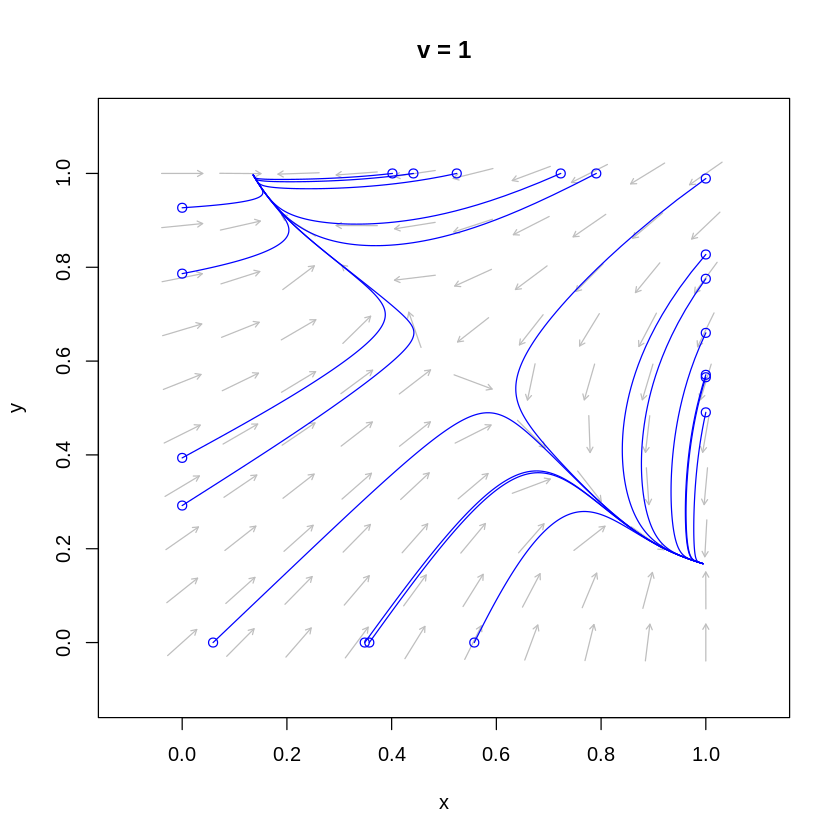

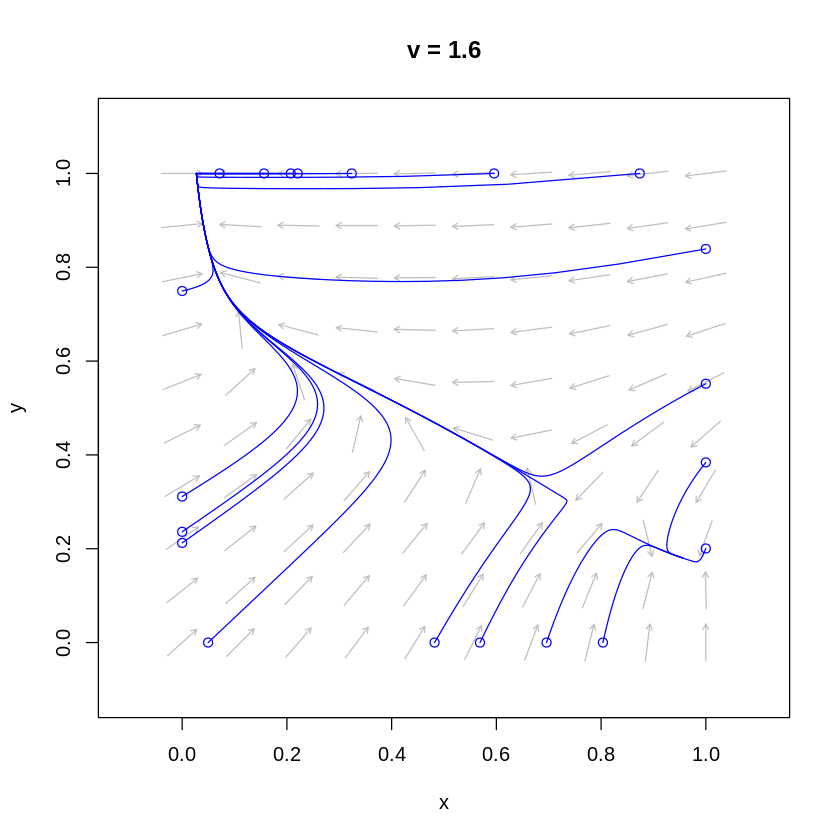

In [78]:
for (v in c(1, 1.6)){
        
        parms = c(alpha1, alpha2, beta1, beta2, gamma1, gamma2, k1, k2, v)

        # Añadamos a este diagrama de espacio fase un campo vectorial
        flowField(Angeli2004, xlim = c(0, 1), ylim = c(0, 1), 
                  parameters = parms, points = 10, add = FALSE, 
                  main = paste0("v = ", v))

        # Genera n condiciones iniciales al azar, 
        # Pero sobre el márgen ([x = 0,1; y = rand] y vice versa)
        
        for (ii in seq(1,20,1) ){
                
                # Generar 3 números aleatorios
                r1 = runif(1) 
                r2 = runif(1)
                r3 = runif(1)

                if (r1 < 0.5){
                        
                        ini = c(r2 < 0.5, r3)
                        
                } 
                
                else {
                        
                ini = c(r3, r2 < 0.5)
                
                }

                trajectory(Angeli2004, y0 = ini, tlim = c(0,10), parameters = parms, col = "blue")
        }
}

# Pregunta 3: Señales de alerta temprana

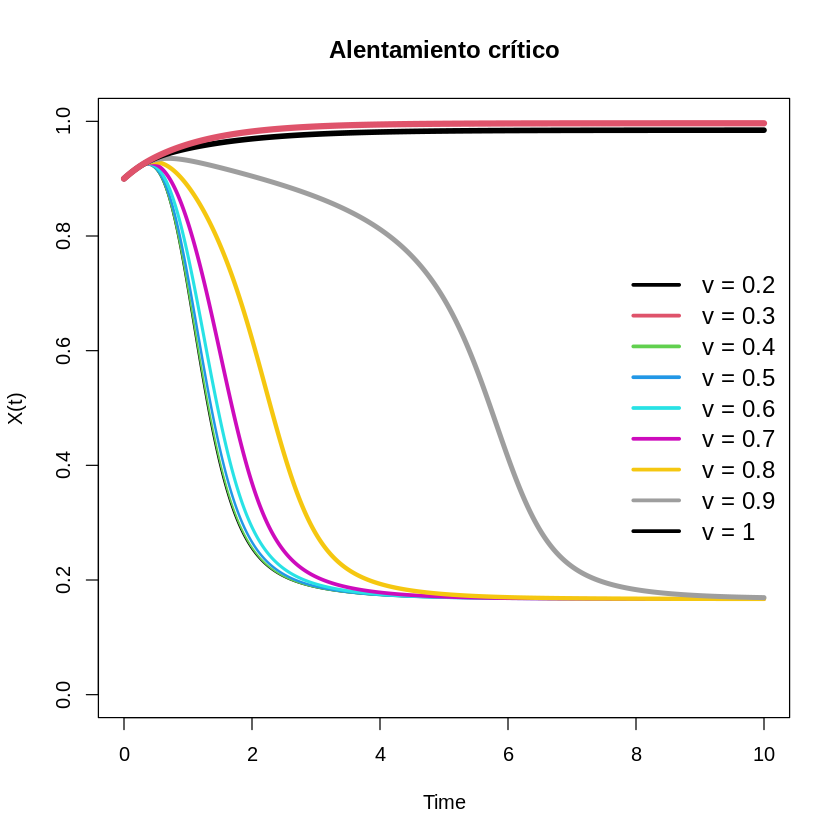

In [84]:
LineWidth = 1
LineColor = 2

# parámetro de bifurcación - 
for (v in seq(0.2,1,0.1)){
  
  parms = c(alpha1, alpha2, beta1, beta2, gamma1, gamma2, k1, k2, v)
  
  # ¡A integrar!
  out <- ode(y = ini_2, times = tspan, func = Angeli2004, parms = parms)
  
  if (v == 0.2){
          
        plot(out[,1], out[,3],type = "l", ylim=c(0,1),
             col = 1, xlab = "Time", ylab = "X(t)", 
             lwd = 1, main="Alentamiento crítico")
          
  } 
  
  else {
          
        lines(out[,1], out[,3],type = "l", col= LineColor, lwd = LineWidth)
  }
  
  LineWidth = LineWidth + 0.5
  LineColor = LineColor + 1
}

legend("right", legend = paste0("v = ",seq(0.2,1,0.1)), col = seq(1,11), cex = 1.2, 
       bty = "n", lty  = 1, lwd = 3)

# Pregunta 4: Diagrama de bifurcación 

Declarar los valores de parámetros que permanecen constantes

In [86]:
alpha1 <- 1
alpha2 <- 1
beta1 <- 200
beta2 <- 10
gamma1 <- 4
gamma2 <- 4
k1 <- 30
k2 <- 1
# v <- 1

In [87]:
model <- function(time, state, parms) {
  with(as.list(c(state, parms)), {

    dx <- alpha1*(1-x) - beta1*x*(v*y)^gamma1/(k1+(v*y)^gamma1)
    dy <- alpha2*(1-y) - beta2*y*x^gamma2/(k2+x^gamma2)

    return(list(c(dx, dy)))
  })
}

In [89]:
p <- c(alpha1 = 1, alpha2 = 1, beta1 = 200, beta2 = 10, gamma1 = 4, gamma2 = 4, k1 = 30, k2 = 1, v = 1)

In [90]:
s <- c(x = 0, y = 0)

        x         y 
0.5057743 0.6195077 
Unstable point, eigenvalues:  -4.795959 1.204608 
        x         y 
0.9946980 0.1681565 
Stable point, eigenvalues:  -5.989611 -0.9625594 
        x         y 
0.1357302 0.9966187 
Stable point, eigenvalues:  -7.419698 -0.9512533 


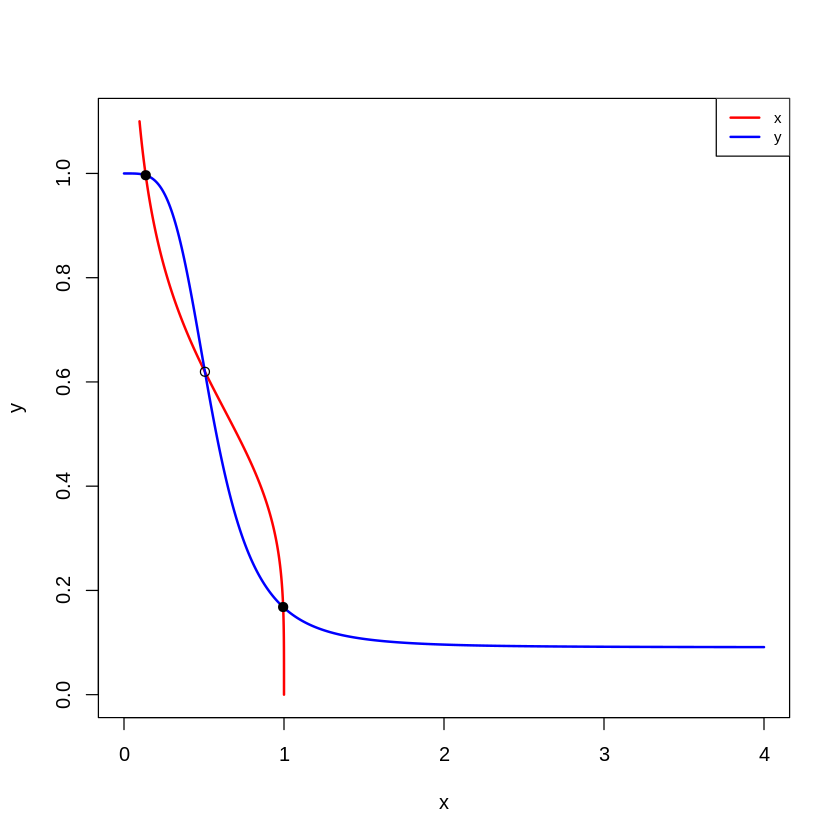

In [92]:
plane(xmax = 4)
mid <- newton(s,plot=T)
low <- newton(c(x=1,y=0),plot=T)
hig <- newton(c(x=0,y=1),plot=T)

Starting at v = 1 with:
        x         y 
0.1357302 0.9966187 
Starting at v = 1 with:
        x         y 
0.9946980 0.1681565 
Final point at v = 1.796859 
If this looks wrong try changing the step size
Starting at v = 1 with:
        x         y 
0.5057743 0.6195077 
Final point at v = 1.796859 
If this looks wrong try changing the step size
Final point at v = 0.8315781 
If this looks wrong try changing the step size


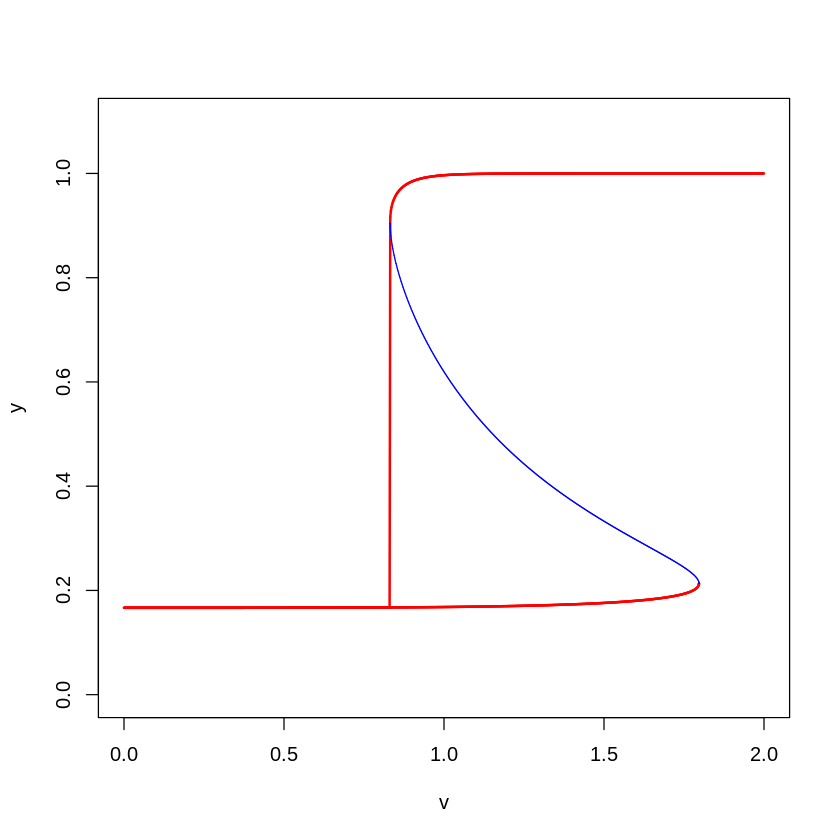

In [93]:
continue(state=hig, parms=p, odes=model, x="v", step=0.001, xmin=0, xmax=2,y="y", ymin=0, ymax=1.1) # log="", time=0, positive=TRUE, add=TRUE)
continue(state=low, parms=p, odes=model, x="v", step=0.001, xmin=0, xmax=2,y="y", ymin=0, ymax=1.1, log="", time=0, positive=TRUE, add=TRUE)
continue(state=mid, parms=p, odes=model, x="v", step=0.001, xmin=0, xmax=2,y="y", ymin=0, ymax=1.1, log="", time=0, positive=TRUE, add=TRUE)